### Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

file = "/content/gdrive/My Drive/creditcard.csv"

Mounted at /content/gdrive


In [ ]:
import pandas as pd
data = pd.read_csv(file)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data[['Time','Amount']]

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


### Importing Required Libraries

In [ ]:
!pip install tenseal

import torch
import tenseal as ts
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import random
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
import time
from time import time
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Preprocessing

##### Scaling the 'Time' and 'Amount' Column

In [ ]:
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


#### Random Under Sampling

In [ ]:
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.179976,-0.994079
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.307413,0.812780
239,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,...,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.027947,-0.993104
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,3.007895,0.768888
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,3.226717,0.006967


#### 50-50 Ratio Distribution of both classes

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_data['Class'].value_counts()/len(new_data))

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


#### Correlation Matrix

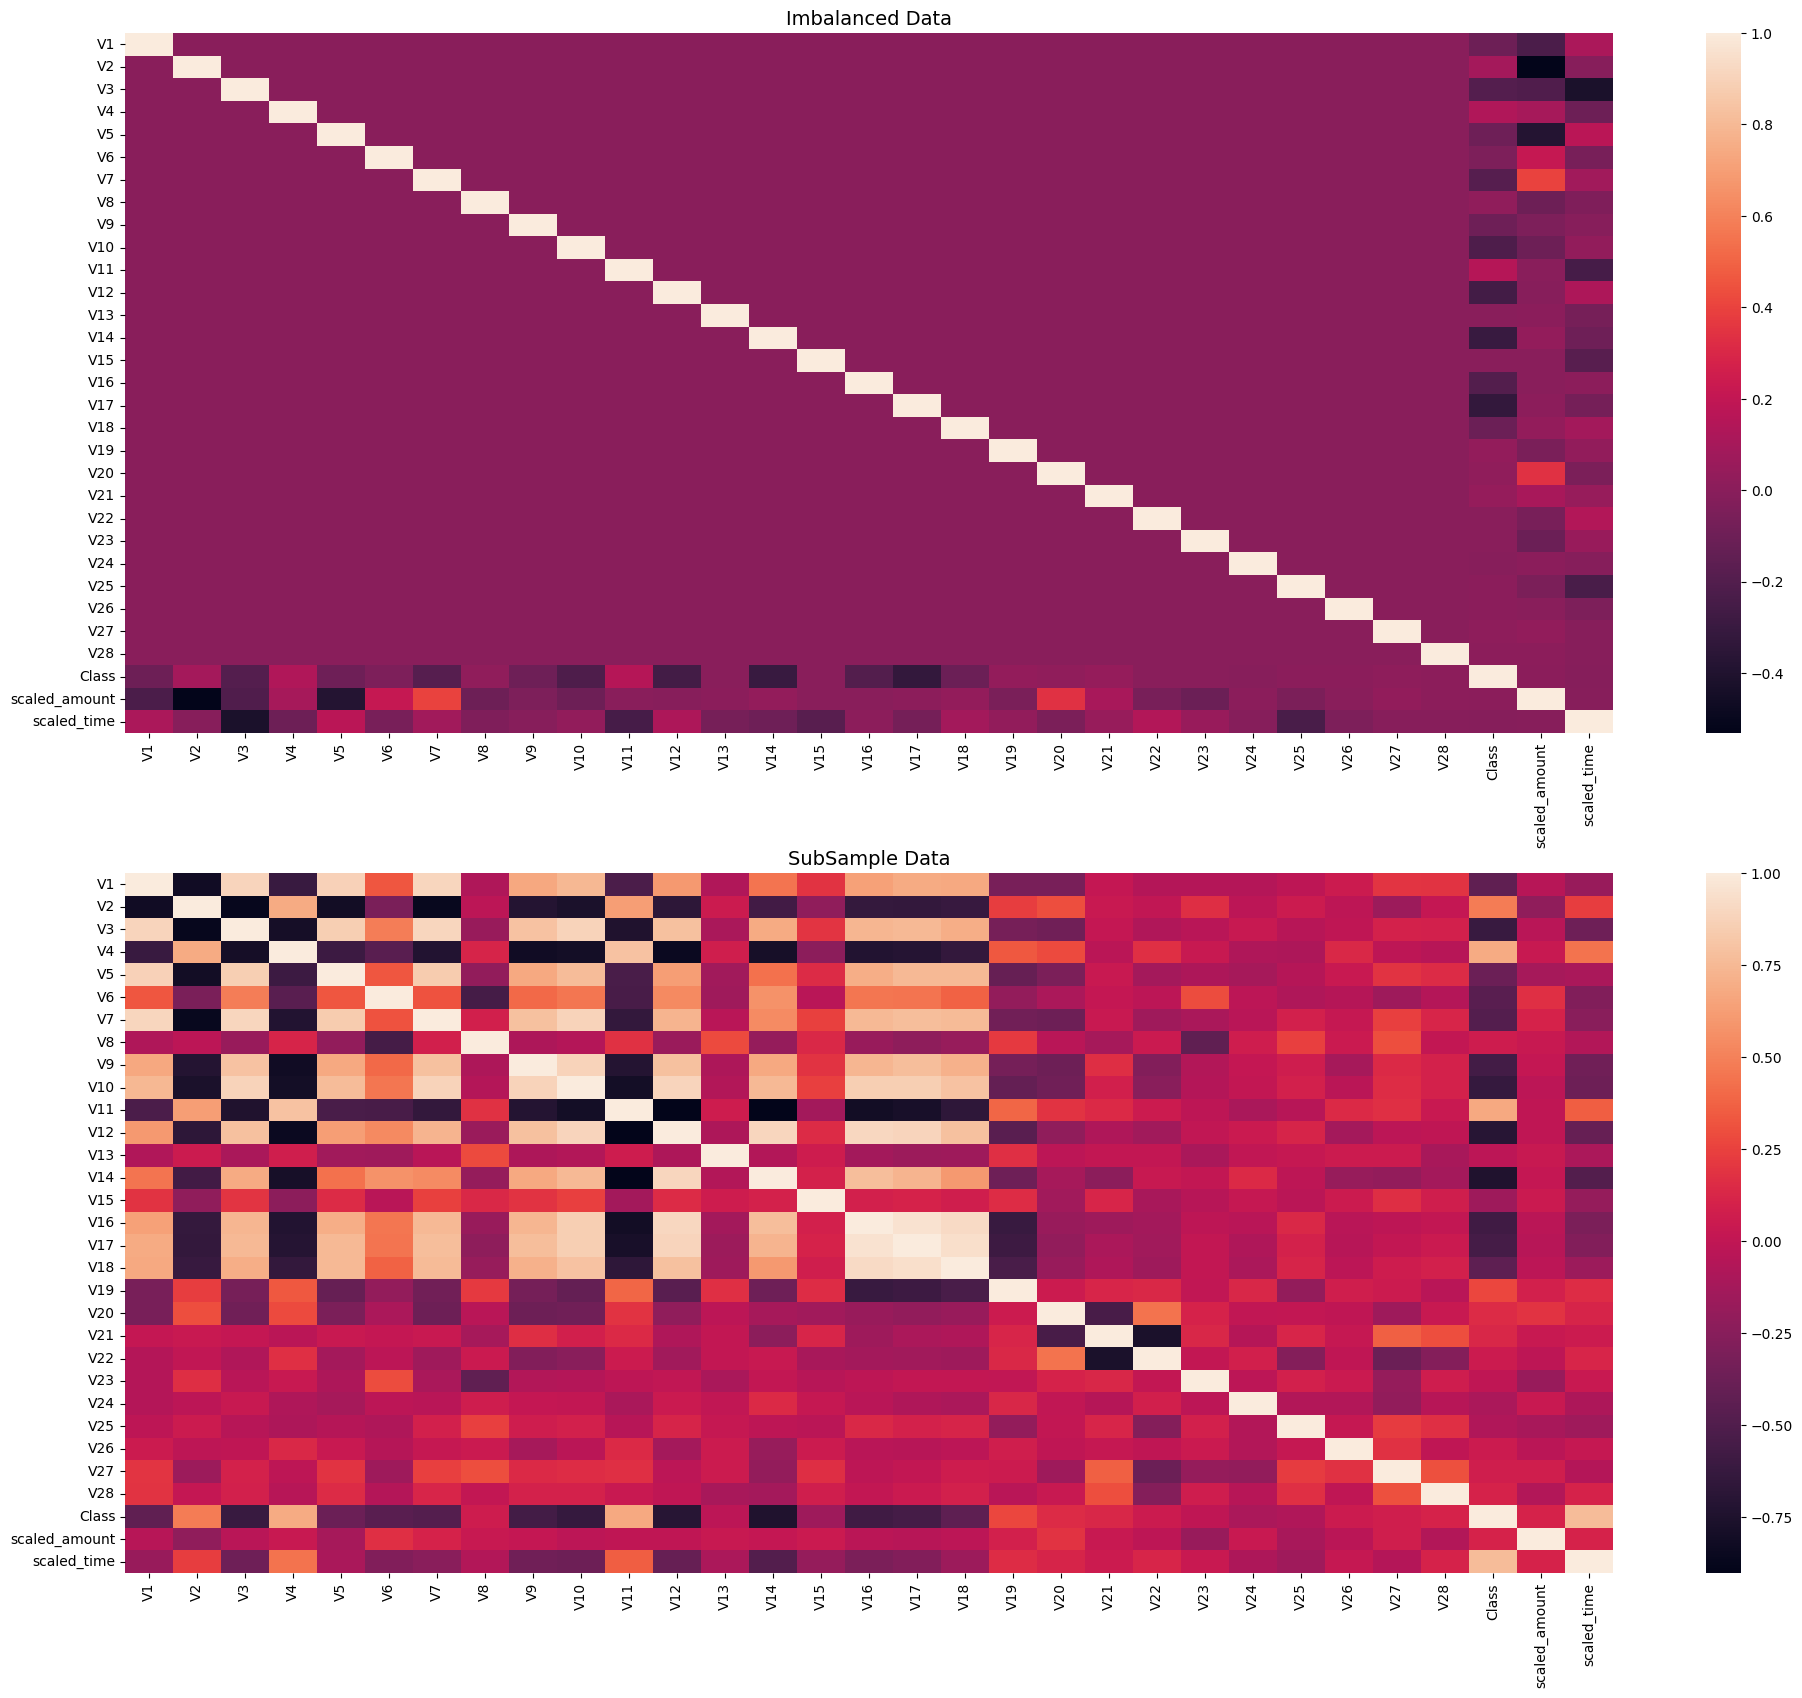

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = data.corr()
sns.heatmap(corr, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Data", fontsize=14)


sub_sample = new_data.corr()
sns.heatmap(sub_sample, annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Data', fontsize=14)
plt.show()

#### Box Plot

#### -> Negative Correlation

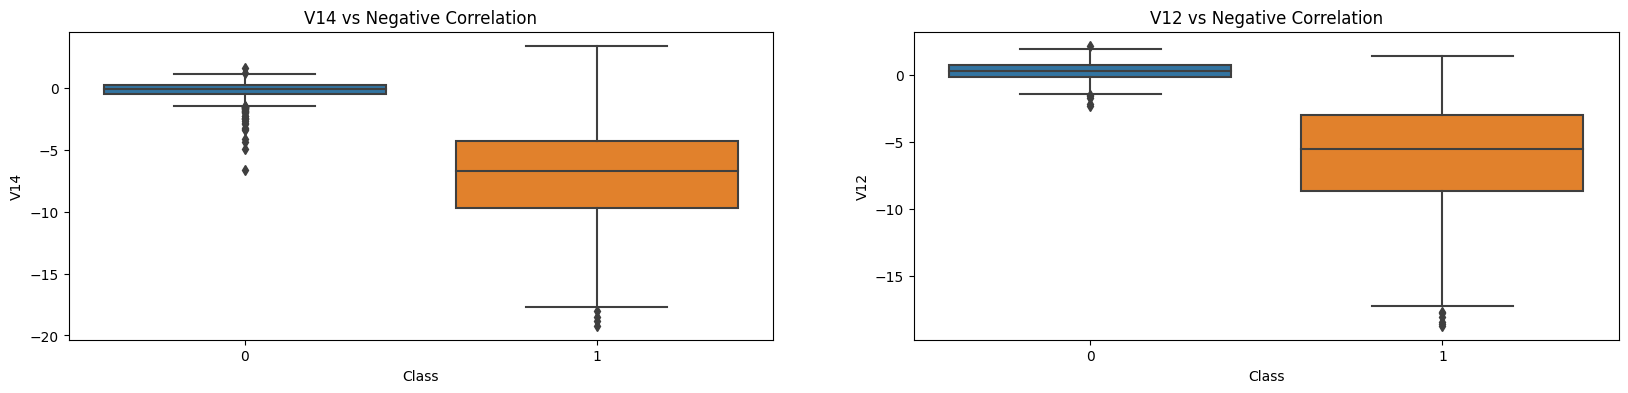

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(x="Class", y="V14", data=new_data, ax=axes[0])
axes[0].set_title('V14 vs Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_data, ax=axes[1])
axes[1].set_title('V12 vs Negative Correlation')

plt.show()

#### -> Positive Correlation

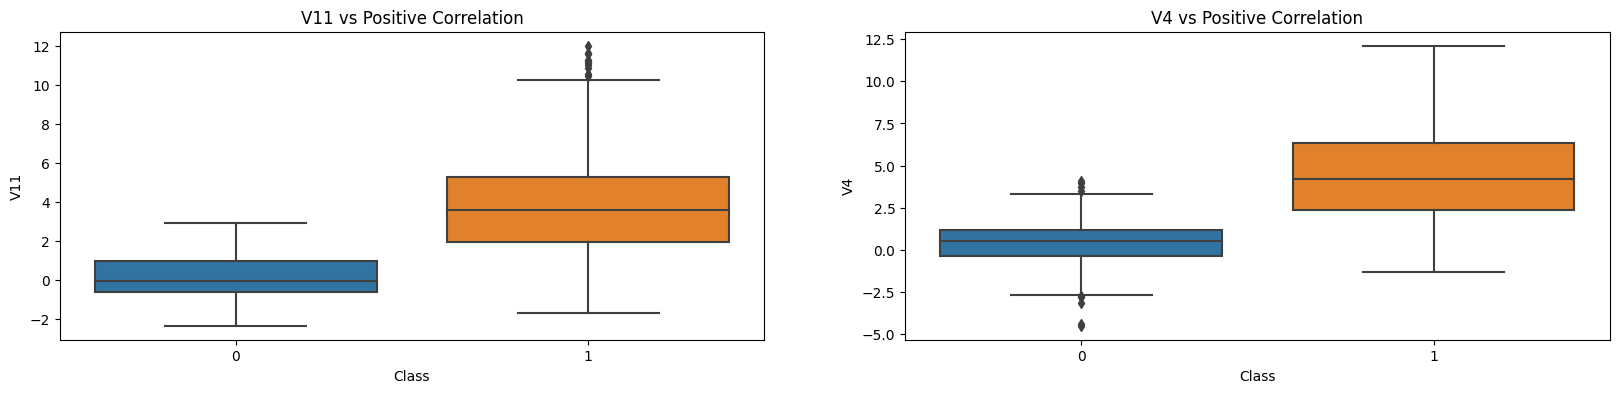

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=new_data, ax=axes[0])
axes[0].set_title('V11 vs Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_data, ax=axes[1])
axes[1].set_title('V4 vs Positive Correlation')

plt.show()

#### Distribution of Fraud Transaction in different features

<ipython-input-61-9b6533ce6d74>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_features, ax=ax1, fit=norm)
<ipython-input-61-9b6533ce6d74>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_features, ax=ax2, fit=norm)
<ipython-input-61-9b6533ce6d74>:12: UserWarning: 

`distplot` is a dep

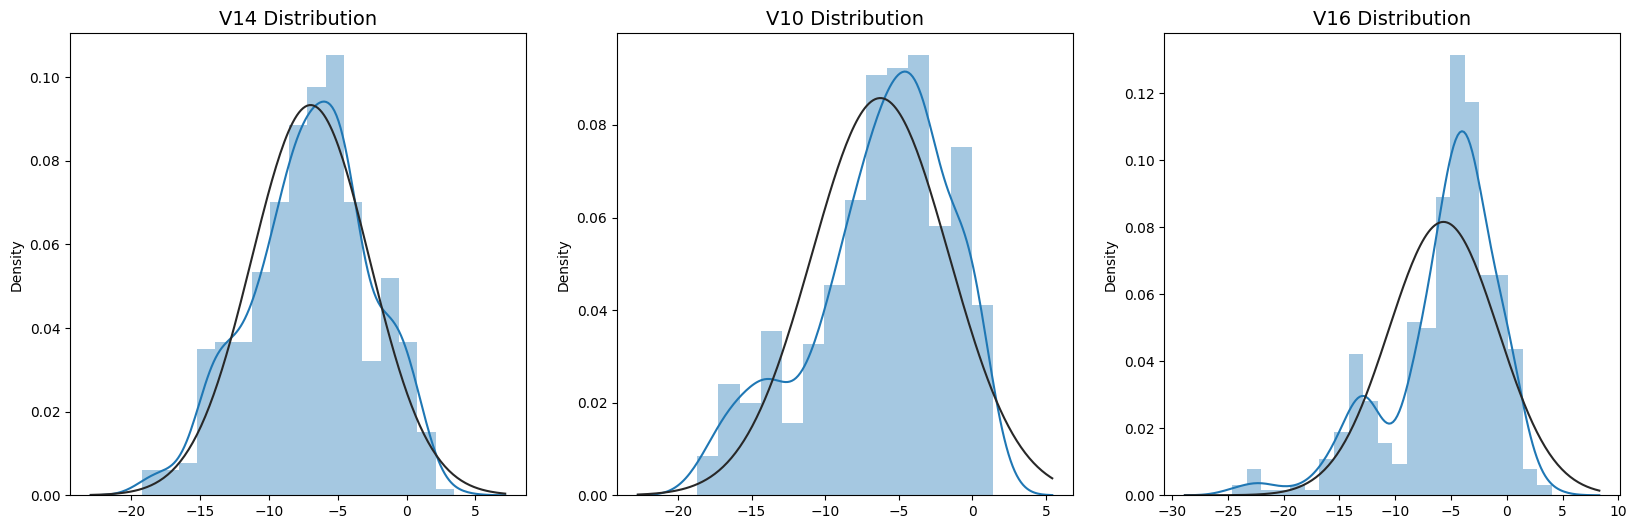

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_features = new_data['V14'].loc[new_data['Class'] == 1].values
sns.distplot(v14_features, ax=ax1, fit=norm)
ax1.set_title('V14 Distribution', fontsize=14)

v12_features = new_data['V12'].loc[new_data['Class'] == 1].values
sns.distplot(v12_features, ax=ax2, fit=norm)
ax2.set_title('V10 Distribution', fontsize=14)

v10_features = new_data['V10'].loc[new_data['Class'] == 1].values
sns.distplot(v10_features, ax=ax3, fit=norm)
ax3.set_title('V16 Distribution', fontsize=14)

plt.show()

#### Removing Outliers

In [ ]:
v14_fraud = new_data['V14'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_data = new_data.drop(new_data[(new_data['V14'] > v14_upper) | (new_data['V14'] < v14_lower)].index)
print("")
v12_fraud = new_data['V12'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_data = new_data.drop(new_data[(new_data['V12'] > v12_upper) | (new_data['V12'] < v12_lower)].index)

print('Number of Instances after outliers removal: {}'.format(len(new_data)))
print(" ")


v10_fraud = new_data['V10'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_data = new_data.drop(new_data[(new_data['V10'] > v10_upper) | (new_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_data)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.0499976898594]

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.4311310279993, -18.0475965708216, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
 
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-18.2711681738888, -24.5882624372475, -15.3460988468775, -19.836148851696, -14.9246547735487, -16.3035376590131, -22.1870885620007, -15.5637913387301, -20.9491915543611, -22.1870885620007, -15.2399619587112, -22.1870885620007, -16.6011969664137, -15.2318333653018, -23.2282548357516, -16.2556117491401, -14.9246547735487, -17.1415136412892, -15.2399619587112, -15.1241628144947, -

#### Box Plot After Removing Outliers

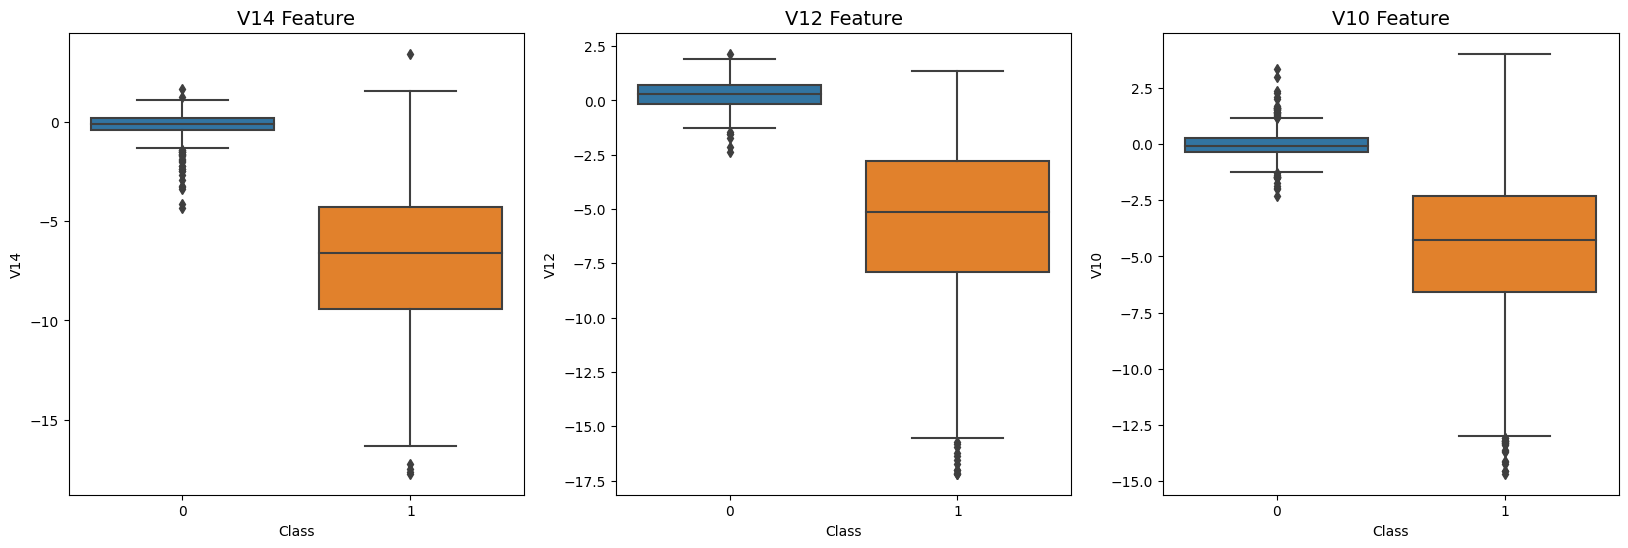

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(x="Class", y="V14", data=new_data,ax=ax1)
ax1.set_title("V14 Feature", fontsize=14)

sns.boxplot(x="Class", y="V12", data=new_data, ax=ax2)
ax2.set_title("V12 Feature", fontsize=14)

sns.boxplot(x="Class", y="V10", data=new_data, ax=ax3)
ax3.set_title("V10 Feature", fontsize=14)

plt.show()

#### Dimensionality Reduction and Clustering

In [ ]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

t0 = time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.026 s


#### Clustering

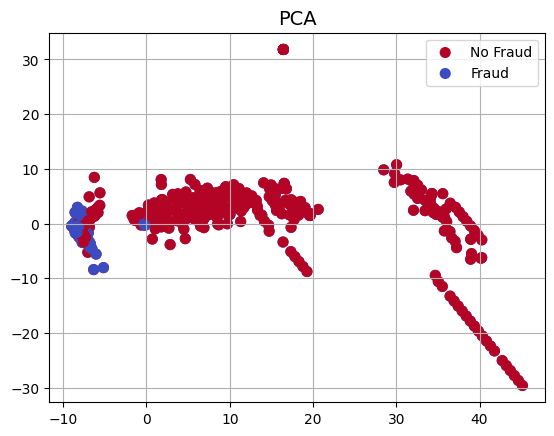

In [ ]:
f.suptitle('Clusters after Dimensionality Reduction', fontsize=14)

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('PCA', fontsize=14)
plt.legend()

plt.grid(True)
plt.show()

#### Plotting the Learning Curve of Logistic Regression

In [ ]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


LogisticRegression().fit(X_train, y_train)
training_score = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Training Score  ", round(training_score.mean(), 2) * 100, "% accuracy")

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Training Score   98.0 % accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross Validation Score:  99.34%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#### Learning Curve

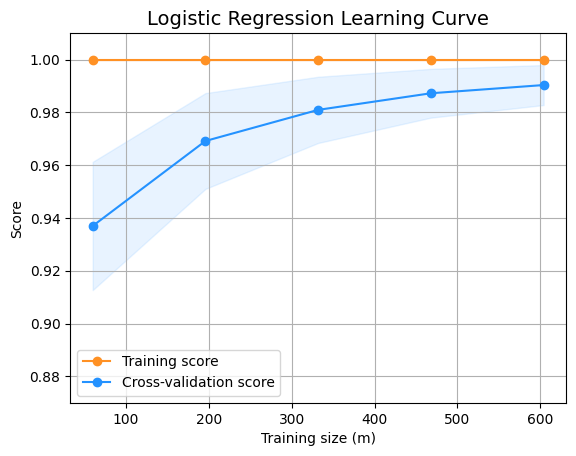

In [ ]:
def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    if ylim is not None:
        plt.ylim(*ylim)
        train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    plt.title("Logistic Regression Learning Curve", fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

#### Accuracy, Recall, F1-Score, Precision

In [ ]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))

# print('How it should be:\n')
# print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
# print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
# print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
# print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))

Overfitting: 

Recall Score: 0.96
Precision Score: 0.54
F1 Score: 0.69
Accuracy Score: 0.58
How it should be:

Accuracy Score: nan
Precision Score: nan
Recall Score: nan
F1 Score: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Splitting the dataset into Training and Test Data

In [ ]:
def split_train_test(x, y, test_ratio=0.3):
    idxs = [i for i in range(len(x))]
    random.shuffle(idxs)
    # delimiter between test and train data
    delim = int(len(x) * test_ratio)
    test_idxs, train_idxs = idxs[:delim], idxs[delim:]
    return x[train_idxs], y[train_idxs], x[test_idxs], y[test_idxs]

# drop rows with missing values
dataset = new_data.dropna()
# balance data
grouped = dataset.groupby('Class')
dataset = grouped.apply(lambda x: x.sample(grouped.size().min(), random_state=73).reset_index(drop=True))
# extract labels
y = torch.tensor(dataset["Class"].values).float().unsqueeze(1)
dataset = dataset.drop("Class", 'columns')
# standardize data
dataset = (dataset - dataset.mean()) / dataset.std()
x = torch.tensor(dataset.values).float()

x_train, y_train, x_test, y_test = split_train_test(x, y)

<ipython-input-19-4aafdff67ded>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop("Class", 'columns')


### Training a Logistic Regression Model

In [ ]:
class LR(torch.nn.Module):

    def __init__(self, n_features):
        super(LR, self).__init__()
        self.lr = torch.nn.Linear(n_features, 1)
        
    def forward(self, x):
        out = torch.sigmoid(self.lr(x))
        return out

In [ ]:
features = x_train.shape[1]
model = LR(features)
# use gradient descent with a learning_rate=1
optim = torch.optim.SGD(model.parameters(), lr=1)
# use Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()

In [ ]:
# define the number of epochs for both plain and encrypted training
EPOCHS = 5

def train(model, optim, criterion, x, y, epochs=EPOCHS):
    for e in range(1, epochs + 1):
        optim.zero_grad()   # Sets the gradients of all model parameters to zero using optim.zero_grad(). This is necessary because 
        # PyTorch accumulates gradients on subsequent backward passes by default, so we need to clear them before calculating gradients for the current batch of data.
        out = model(x)
        loss = criterion(out, y)
        loss.backward() # Computes the gradients of the loss with respect to all model parameters using loss.backward()
        optim.step()    # Updates the model parameters by taking a step in the opposite direction of the gradients using optim.step().
        print(f"Loss at epoch {e}: {loss.data}")
    return model

model = train(model, optim, criterion, x_train, y_train)

Loss at epoch 1: 0.7951291799545288
Loss at epoch 2: 0.30758434534072876
Loss at epoch 3: 0.2514585256576538
Loss at epoch 4: 0.2131306231021881
Loss at epoch 5: 0.18765997886657715


In [ ]:
def accuracy(model, x, y):
    out = model(x)
    correct = torch.abs(y - out) < 0.5
    return correct.float().mean()

plain_accuracy = accuracy(model, x_test, y_test)
print(f"Accuracy on plain test_set: {plain_accuracy}")

Accuracy on plain test_set: 0.9197080135345459


### Encrypted Evaluation

In [ ]:
class EncryptedLR:
    
    def __init__(self, torch_lr):
        # TenSEAL processes lists and not torch tensors,
        # so we take out the parameters from the PyTorch model
        self.weight = torch_lr.lr.weight.data.tolist()[0]
        self.bias = torch_lr.lr.bias.data.tolist()
        
    def forward(self, enc_x):
        # We don't need to perform sigmoid as this model
        # will only be used for evaluation, and the label
        # can be deduced without applying sigmoid
        enc_out = enc_x.dot(self.weight) + self.bias
        return enc_out
    
    def __call__(self, *args, **kwargs):   # The __call__ method is defined as a shorthand for calling the forward method.
        return self.forward(*args, **kwargs)
        
    ################################################
    ## You can use the functions below to perform ##
    ## the evaluation with an encrypted model     ##
    ################################################
    
    def encrypt(self, context):
        self.weight = ts.ckks_vector(context, self.weight)
        self.bias = ts.ckks_vector(context, self.bias)
        
    def decrypt(self, context):
        self.weight = self.weight.decrypt()
        self.bias = self.bias.decrypt()
        

eelr = EncryptedLR(model)

In [ ]:
# parameters
poly_mod_degree = 4096
coeff_mod_bit_sizes = [40, 20, 40]
# The poly_mod_degree variable specifies the degree of the polynomial used in the underlying mathematical operations. The coeff_mod_bit_sizes variable is a list that specifies the bit sizes of the moduli used in the ciphertext. In this case, the first and third elements are 40 bits, and the second element is 20 bits.

# create TenSEALContext
ctx_eval = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
# The security level is set to -1, which means that the library will choose the security level automatically based on the provided parameters.

# scale of ciphertext to use
ctx_eval.global_scale = 2 ** 20
# The global_scale attribute of the TenSEALContext object is set to 2 ** 20, which is the scale of the ciphertext to be used.

# this key is needed for doing dot-product operations
ctx_eval.generate_galois_keys()
# The generate_galois_keys method is called on the TenSEALContext object to generate the Galois keys that are needed for performing dot-product operations during encrypted evaluation.

In [ ]:
t_start = time.time()
enc_x_test = [ts.ckks_vector(ctx_eval, x.tolist()) for x in x_test]
t_end = time.time()
print(f"Encryption of the test-set took {int(t_end - t_start)} seconds")

Encryption of the test-set took 1 seconds


In [ ]:
def encrypted_evaluation(eelr, enc_x_test, y_test):
    t_start = time.time()
    
    correct = 0
    for enc_x, y in zip(enc_x_test, y_test):
        # encrypted evaluation
        enc_out = eelr(enc_x)
        # plain comparison
        out = enc_out.decrypt()
        out = torch.tensor(out)
        out = torch.sigmoid(out)
        if torch.abs(out - y) < 0.5:
            correct += 1
    
    t_end = time.time()
    print(f"Evaluated test_set of {len(x_test)} entries in {int(t_end - t_start)} seconds")
    print(f"Accuracy: {correct}/{len(x_test)} = {correct / len(x_test)}")
    return correct / len(x_test)
    

encrypted_accuracy = encrypted_evaluation(eelr, enc_x_test, y_test)
diff_accuracy = plain_accuracy - encrypted_accuracy
print(f"Difference between plain and encrypted accuracies: {diff_accuracy}")
if diff_accuracy < 0:
    print("Oh! We got a better accuracy on the encrypted test-set! The noise was on our side...")

Evaluated test_set of 274 entries in 2 seconds
Accuracy: 235/274 = 0.8576642335766423
Difference between plain and encrypted accuracies: 0.06204378604888916


### Training an Encrypted Logistic Regression Model on Encrypted Data

In [ ]:
class EncryptedLR:

    # The class constructor takes as input a torch linear regression model and initializes the weight and bias 
    # coefficients. The forward method takes an encrypted tensor as input and returns the encrypted 
    # output tensor computed as the dot product of the input tensor and the weights plus the bias, followed 
    # by the sigmoid function. The backward method takes as input encrypted tensors for input, output, and 
    # expected output, and accumulates gradients and the number of iterations. The update_parameters method 
    # updates the weights and biases according to the accumulated gradients and the number of iterations.
    
    def __init__(self, torch_lr):
        self.weight = torch_lr.lr.weight.data.tolist()[0]
        self.bias = torch_lr.lr.bias.data.tolist()
        # we accumulate gradients and counts the number of iterations
        self._delta_w = 0
        self._delta_b = 0
        self._count = 0
        
    def forward(self, enc_x):
        enc_out = enc_x.dot(self.weight) + self.bias
        enc_out = EncryptedLR.sigmoid(enc_out)
        return enc_out
    
    def backward(self, enc_x, enc_out, enc_y):
        out_minus_y = (enc_out - enc_y)
        self._delta_w += enc_x * out_minus_y
        self._delta_b += out_minus_y
        self._count += 1
        
    def update_parameters(self):
        if self._count == 0:
            raise RuntimeError("You should at least run one forward iteration")
        # update weights
        # We use a small regularization term to keep the output
        # of the linear layer in the range of the sigmoid approximation
        self.weight -= self._delta_w * (1 / self._count) + self.weight * 0.05
        self.bias -= self._delta_b * (1 / self._count)
        # reset gradient accumulators and iterations count
        self._delta_w = 0
        self._delta_b = 0
        self._count = 0
    
    @staticmethod
    def sigmoid(enc_x):
        # We use the polynomial approximation of degree 3
        # sigmoid(x) = 0.5 + 0.197 * x - 0.004 * x^3
        # from https://eprint.iacr.org/2018/462.pdf
        # which fits the function pretty well in the range [-5,5]
        return enc_x.polyval([0.5, 0.197, 0, -0.004])
    
    def plain_accuracy(self, x_test, y_test):
        # evaluate accuracy of the model on
        # the plain (x_test, y_test) dataset
        w = torch.tensor(self.weight)
        b = torch.tensor(self.bias)
        out = torch.sigmoid(x_test.matmul(w) + b).reshape(-1, 1)
        correct = torch.abs(y_test - out) < 0.5
        return correct.float().mean()    
    
    def encrypt(self, context):
        self.weight = ts.ckks_vector(context, self.weight)
        self.bias = ts.ckks_vector(context, self.bias)
        
    def decrypt(self):
        self.weight = self.weight.decrypt()
        self.bias = self.bias.decrypt()
        
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

In [ ]:
# parameters
poly_mod_degree = 8192
coeff_mod_bit_sizes = [40, 21, 21, 21, 21, 21, 21, 40]
# create TenSEALContext
ctx_training = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
ctx_training.global_scale = 2 ** 21
ctx_training.generate_galois_keys()

In [ ]:
t_start = time.time()
enc_x_train = [ts.ckks_vector(ctx_training, x.tolist()) for x in x_train]
enc_y_train = [ts.ckks_vector(ctx_training, y.tolist()) for y in y_train]
t_end = time.time()
print(f"Encryption of the training_set took {int(t_end - t_start)} seconds")

Encryption of the training_set took 17 seconds


In [ ]:
n_features = x_train.shape[1]
eelr = EncryptedLR(LR(n_features))
accuracy = eelr.plain_accuracy(x_test, y_test)
print(f"Accuracy at epoch #0 is {accuracy}")

times = []
for epoch in range(EPOCHS):
    eelr.encrypt(ctx_training)
    
    # if you want to keep an eye on the distribution to make sure
    # the function approximation is still working fine
    # WARNING: this operation is time consuming
    # encrypted_out_distribution(eelr, enc_x_train)
    
    t_start = time.time()
    for enc_x, enc_y in zip(enc_x_train, enc_y_train):
        enc_out = eelr.forward(enc_x)
        eelr.backward(enc_x, enc_out, enc_y)
    eelr.update_parameters()
    t_end = time.time()
    times.append(t_end - t_start)
    
    eelr.decrypt()
    accuracy = eelr.plain_accuracy(x_test, y_test)
    print(f"Accuracy at epoch #{epoch + 1} is {accuracy}")


print(f"\nAverage time per epoch: {int(sum(times) / len(times))} seconds")
print(f"Final accuracy is {accuracy}")

diff_accuracy = plain_accuracy - accuracy
print(f"Difference between plain and encrypted accuracies: {diff_accuracy}")
if diff_accuracy < 0:
    print("Oh! We got a better accuracy when training on encrypted data! The noise was on our side...")

Accuracy at epoch #0 is 0.30656933784484863
Accuracy at epoch #1 is 0.8832116723060608
Accuracy at epoch #2 is 0.8613138794898987
Accuracy at epoch #3 is 0.4489051103591919
Accuracy at epoch #4 is 0.5510948896408081
Accuracy at epoch #5 is 0.4489051103591919

Average time per epoch: 154 seconds
Final accuracy is 0.4489051103591919
Difference between plain and encrypted accuracies: 0.470802903175354
